In [ ]:
import pandas as pd

# Загрузка очищенного и нормализованного DataFrame
df = pd.read_csv('/content/cleaned_normalized_data.csv', index_col=0)
df.shape

(487, 48281)

## Реализация модели при помощи XGBoost

<ipython-input-2-fc095d331872>:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pathology_T_stage'] = df['pathology_T_stage'].replace({'t2': 2, 't3': 3}).astype(int)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:23:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found: {'subsample': 0.8, 'n_estimators': 50, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.8}

--- Fold 1 ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:24:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🎯 Accuracy: 0.6875

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.56      0.58        50
           1       0.73      0.77      0.75        78

    accuracy                           0.69       128
   macro avg       0.67      0.66      0.67       128
weighted avg       0.68      0.69      0.68       128

Accuracy: 0.688
Sensitivity (Recall): 0.769
Specificity: 0.560
PPV (Precision): 0.732
NPV: 0.609
F1-score: 0.750
MCC: 0.335


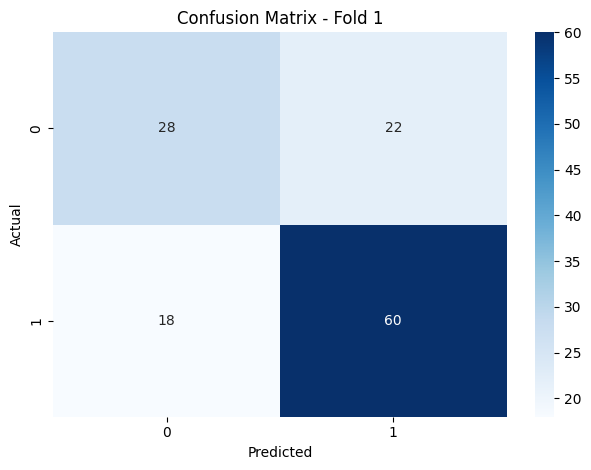


--- Fold 2 ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:26:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🎯 Accuracy: 0.7165354330708661

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.51      0.58        49
           1       0.73      0.85      0.79        78

    accuracy                           0.72       127
   macro avg       0.70      0.68      0.68       127
weighted avg       0.71      0.72      0.71       127

Accuracy: 0.717
Sensitivity (Recall): 0.846
Specificity: 0.510
PPV (Precision): 0.733
NPV: 0.676
F1-score: 0.786
MCC: 0.382


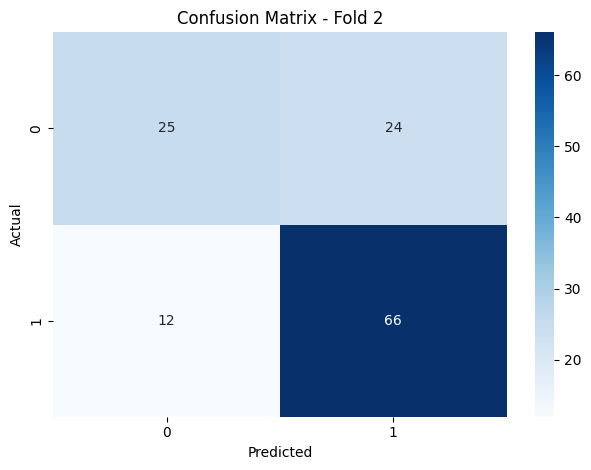


--- Fold 3 ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:28:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🎯 Accuracy: 0.6771653543307087

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.57      0.58        49
           1       0.73      0.74      0.74        78

    accuracy                           0.68       127
   macro avg       0.66      0.66      0.66       127
weighted avg       0.68      0.68      0.68       127

Accuracy: 0.677
Sensitivity (Recall): 0.744
Specificity: 0.571
PPV (Precision): 0.734
NPV: 0.583
F1-score: 0.739
MCC: 0.316


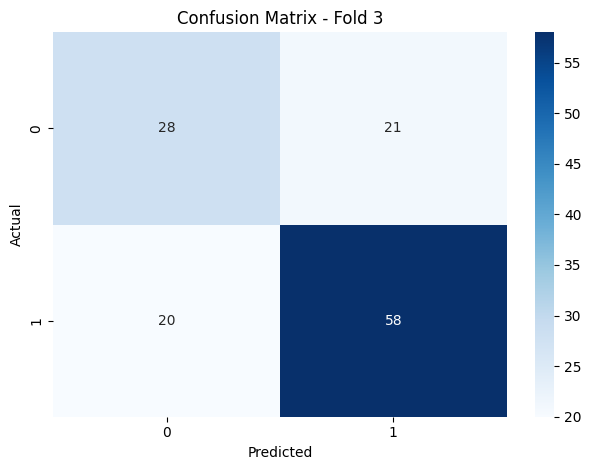

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:29:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



✅ Final Test Accuracy: 0.7604166666666666

📊 Final Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.51      0.62        37
           1       0.75      0.92      0.82        59

    accuracy                           0.76        96
   macro avg       0.77      0.71      0.72        96
weighted avg       0.77      0.76      0.75        96


📈 Biostatistics Metrics on Final Test:
Accuracy: 0.760
Sensitivity (Recall): 0.915
Specificity: 0.514
PPV (Precision): 0.750
NPV: 0.792
F1-score: 0.824
MCC: 0.482

🔵 ROC-AUC: 0.834


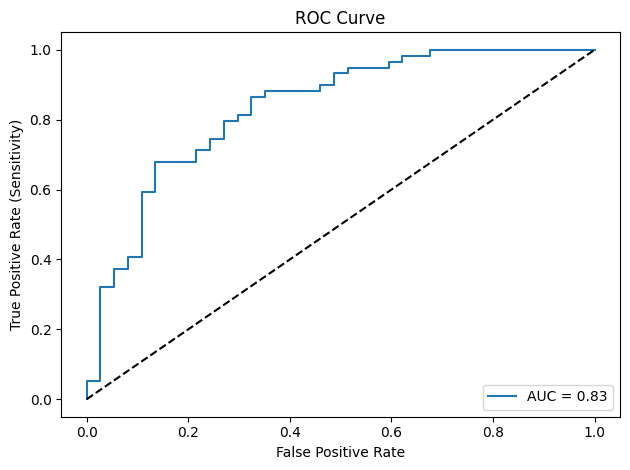

<ipython-input-2-fc095d331872>:136: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


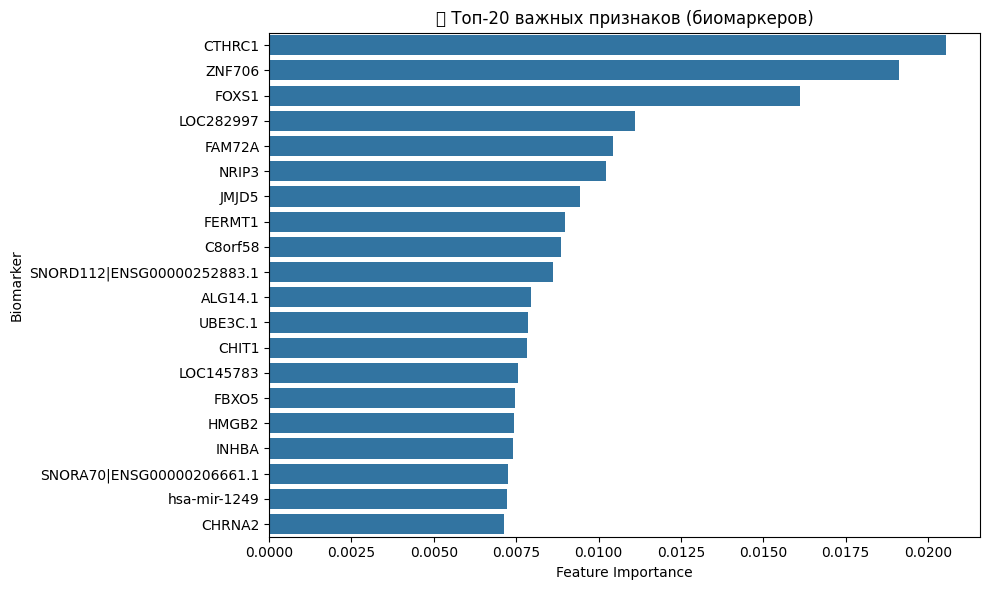


💾 Топ-20 биомаркеров сохранены в 'top_20_biomarkers_xgboost.csv'


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    matthews_corrcoef, roc_auc_score, roc_curve
)
import seaborn as sns
import matplotlib.pyplot as plt


def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = accuracy_score(y_true, y_pred)
    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    ppv = tp / (tp + fp) if (tp + fp) != 0 else 0
    npv = tn / (tn + fn) if (tn + fn) != 0 else 0
    f1 = 2 * tp / (2 * tp + fp + fn) if (2 * tp + fp + fn) != 0 else 0
    mcc = matthews_corrcoef(y_true, y_pred)

    return {
        'Accuracy': accuracy,
        'Sensitivity (Recall)': sensitivity,
        'Specificity': specificity,
        'PPV (Precision)': ppv,
        'NPV': npv,
        'F1-score': f1,
        'MCC': mcc
    }

# Загрузка и подготовка данных
df = pd.read_csv('/content/cleaned_normalized_data.csv', index_col=0)
df = df[df['pathology_T_stage'].isin(['t2', 't3'])].copy()
df['pathology_T_stage'] = df['pathology_T_stage'].replace({'t2': 2, 't3': 3}).astype(int)
df['pathology_T_stage'] = df['pathology_T_stage'].map({2: 0, 3: 1})
df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns)

y = df['pathology_T_stage']
X = df.drop(columns=['pathology_T_stage'])

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Сокращённая настройка гиперпараметров
param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [3, 4],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'gamma': [0, 1]
}

random_search = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    n_jobs=2,
    verbose=1,
    scoring='accuracy',
    random_state=42
)

random_search.fit(X_train_full, y_train_full)
print(f"Best parameters found: {random_search.best_params_}")

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_full, y_train_full), 1):
    print(f"\n--- Fold {fold} ---")
    X_train, X_val = X_train_full.iloc[train_idx], X_train_full.iloc[val_idx]
    y_train, y_val = y_train_full.iloc[train_idx], y_train_full.iloc[val_idx]

    best_model = random_search.best_estimator_
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_val)

    print("🎯 Accuracy:", accuracy_score(y_val, y_pred))
    print("\n📋 Classification Report:\n", classification_report(y_val, y_pred, zero_division=0))

    metrics = calculate_metrics(y_val, y_pred)
    for k, v in metrics.items():
        print(f"{k}: {v:.3f}")

    sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - Fold {fold}")
    plt.tight_layout()
    plt.show()

final_model = random_search.best_estimator_
final_model.fit(X_train_full, y_train_full)
final_preds = final_model.predict(X_test)

print("\n✅ Final Test Accuracy:", accuracy_score(y_test, final_preds))
print("\n📊 Final Classification Report:\n", classification_report(y_test, final_preds, zero_division=0))

final_metrics = calculate_metrics(y_test, final_preds)
print("\n📈 Biostatistics Metrics on Final Test:")
for k, v in final_metrics.items():
    print(f"{k}: {v:.3f}")

if hasattr(final_model, "predict_proba"):
    probs = final_model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, probs)
    fpr, tpr, _ = roc_curve(y_test, probs, pos_label=1)
    print(f"\n🔵 ROC-AUC: {auc:.3f}")

    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Sensitivity)")
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

importances = final_model.feature_importances_
top_indices = importances.argsort()[-20:][::-1]
top_features = [X.columns[i] for i in top_indices]
top_scores = importances[top_indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_scores, y=top_features)
plt.title("🔬 Топ-20 важных признаков (биомаркеров)")
plt.xlabel("Feature Importance")
plt.ylabel("Biomarker")
plt.tight_layout()
plt.show()

top_biomarkers_df = pd.DataFrame({
    "Biomarker": top_features,
    "Importance": top_scores
})

top_biomarkers_df.to_csv("top_20_biomarkers_xgboost.csv", index=False)
print("\n💾 Топ-20 биомаркеров сохранены в 'top_20_biomarkers_xgboost.csv'")

## Реализация модели при помощи LightGBM

Первая и вторая модели построены с использованием одной и той же библиотеки — LightGBM — и обе решают задачу бинарной классификации (t2 против t3), но их архитектура, стиль построения и детализация анализа отличаются по нескольким ключевым направлениям, как в плане инженерной проработки, так и глубины анализа.

Первая модель выглядит более академически выверенной и ориентированной на комплексную валидацию. В ней используется StratifiedKFold вручную для трёхкратной кросс-валидации после подбора гиперпараметров через RandomizedSearchCV. Это делает валидацию более наглядной, даёт возможность визуализировать confusion matrix по фолдам и анализировать стабильность модели. После кросс-валидации проводится финальное обучение на полном тренировочном датасете и предсказание на тестовой выборке. Также она явно выносит расчёт биостатистических метрик в отдельную функцию calculate_metrics, которая кроме Accuracy, F1 и Recall также считает Sensitivity, Specificity, PPV, NPV, MCC — всё это важно для медицинских задач. По сути, эта модель больше ориентирована на задачу в клиническом/биомедицинском контексте, где важна не только точность, но и интерпретация ошибок.

В первой модели более аккуратно обработаны категориальные признаки — применяется pd.get_dummies, и отдельно проходит шаг по очистке имён признаков от недопустимых символов (это спасает от падения LightGBM при JSON-парсинге). Также явно проверяется сбалансированность классов через stratify в train_test_split. После обучения, первая модель визуализирует топ-20 признаков по важности и сохраняет их в отдельный CSV-файл. Также предусмотрена ROC-кривая и AUC-метрика, что подчёркивает медицинскую интерпретируемость.

Вторая модель более “плоская” по архитектуре, она компактнее, не использует ручную кросс-валидацию, а только встроенную в RandomizedSearchCV (cv=3), и затем сразу обучается на всём трейне и предсказывает на тесте. Это упрощает пайплайн, но лишает нас прозрачности валидации модели по фолдам, а также визуализации прогресса и устойчивости. Вторая модель не содержит отдельной кросс-валидации после RandomSearch, не строит confusion matrix по фолдам, не выводит intermediate accuracy, и не показывает, как метрики изменяются от фолда к фолду — то есть отсутствует компонент анализа стабильности. Также она не делает такой акцент на “zero_division” или robust-механизмах в отчётах, что потенциально может вызывать деление на ноль при сильном дисбалансе.

С точки зрения предобработки, вторая модель чуть аккуратнее удаляет одинаковые по значению признаки (X.loc[:, (X != X.iloc[0]).any()]), чего нет в первой. Это может быть полезным, особенно при работе с гетерогенными по источнику данными. Ещё одна небольшая, но важная разница — вторая модель использует drop_first=True в get_dummies, тем самым избегая мультиколлинеарности, чего в первой модели явно нет. Также вторая модель чуть агрессивнее фильтрует признаки и очищает колонки от потенциальных проблемных признаков, которые могли бы вызвать ошибки в моделях.

Обе модели делают финальное обучение на всём тренировочном датасете и оценивают результаты на тестовой выборке, обе считают AUC и строят ROC-кривую, обе сохраняют топ-20 признаков. Однако первая модель более подробна, более “научная”, с акцентом на reproducibility, надёжность метрик и медико-биостатистический разбор. Вторая — более индустриально-практичная, лаконичная и “боевое” решение, когда нужен результат без лишней аналитики, просто максимум эффективности и минимум лишнего кода.

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Number of positive: 234, number of negative: 148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.884273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4059017
[LightGBM] [Info] Number of data points in the train set: 382, number of used features: 44797
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.612565 -> initscore=0.458109
[LightGBM] [Info] Start training from score 0.458109
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

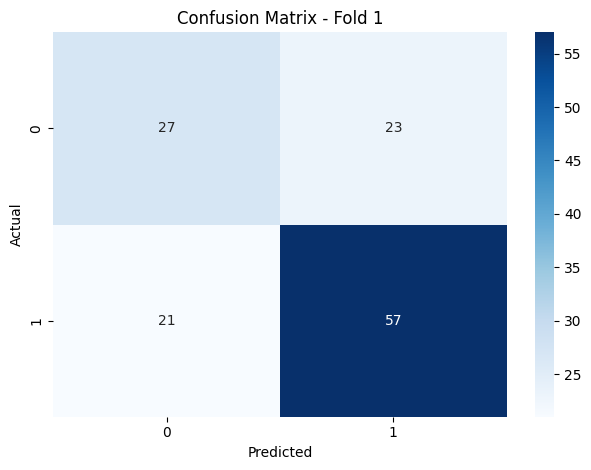


--- Fold 2 ---
[LightGBM] [Info] Number of positive: 156, number of negative: 99
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.145434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2860353
[LightGBM] [Info] Number of data points in the train set: 255, number of used features: 44529
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.611765 -> initscore=0.454736
[LightGBM] [Info] Start training from score 0.454736
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

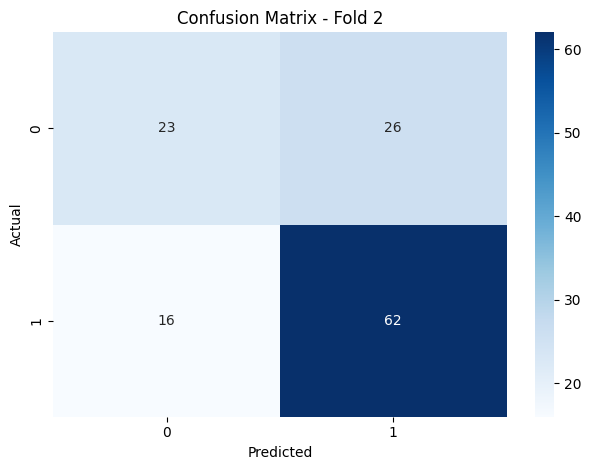


--- Fold 3 ---
[LightGBM] [Info] Number of positive: 156, number of negative: 99
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.573259 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2901089
[LightGBM] [Info] Number of data points in the train set: 255, number of used features: 44537
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.611765 -> initscore=0.454736
[LightGBM] [Info] Start training from score 0.454736
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

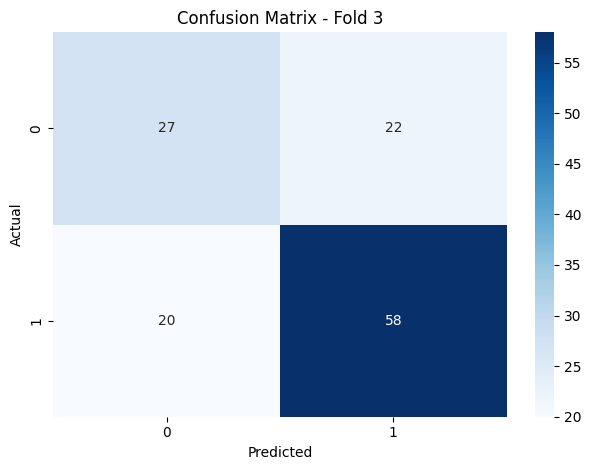

[LightGBM] [Info] Number of positive: 234, number of negative: 148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.972407 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4059017
[LightGBM] [Info] Number of data points in the train set: 382, number of used features: 44797
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.612565 -> initscore=0.458109
[LightGBM] [Info] Start training from score 0.458109
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

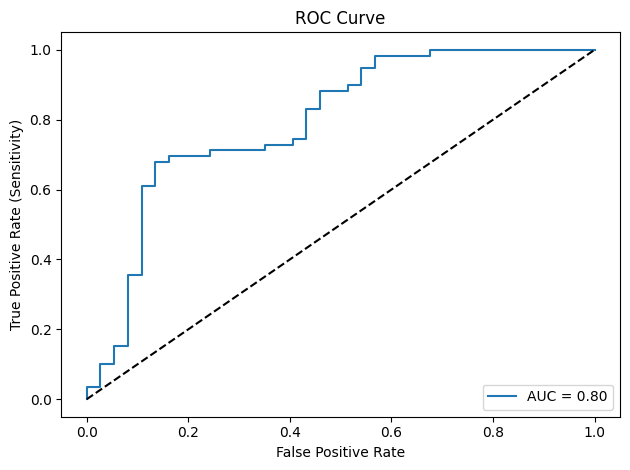

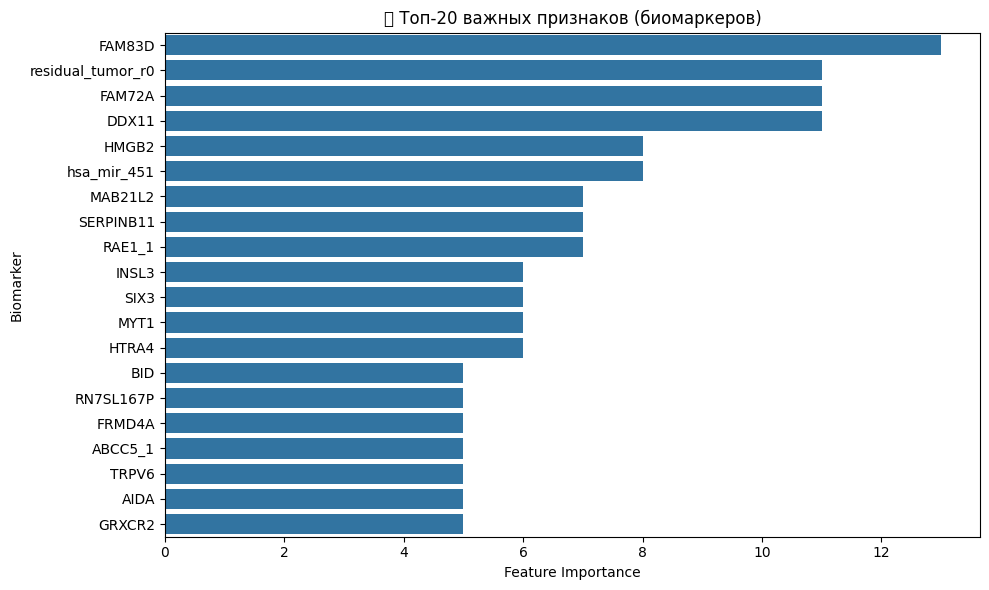


💾 Топ-20 биомаркеров сохранены в 'top_20_biomarkers_lightgbm.csv'


In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold, train_test_split, RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    matthews_corrcoef, roc_auc_score, roc_curve
)
import seaborn as sns
import matplotlib.pyplot as plt

# 📊 Метрики
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = accuracy_score(y_true, y_pred)
    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    ppv = tp / (tp + fp) if (tp + fp) != 0 else 0
    npv = tn / (tn + fn) if (tn + fn) != 0 else 0
    f1 = 2 * tp / (2 * tp + fp + fn) if (2 * tp + fp + fn) != 0 else 0
    mcc = matthews_corrcoef(y_true, y_pred)

    return {
        'Accuracy': accuracy,
        'Sensitivity (Recall)': sensitivity,
        'Specificity': specificity,
        'PPV (Precision)': ppv,
        'NPV': npv,
        'F1-score': f1,
        'MCC': mcc
    }

# 🔹 Загрузка и предобработка данных
df = pd.read_csv('/content/cleaned_normalized_data.csv', index_col=0)
df = df[df['pathology_T_stage'].isin(['t2', 't3'])].copy()
df['pathology_T_stage'] = df['pathology_T_stage'].replace({'t2': 2, 't3': 3}).astype(int)
df['pathology_T_stage'] = df['pathology_T_stage'].map({2: 0, 3: 1})
df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns)

y = df['pathology_T_stage']
X = df.drop(columns=['pathology_T_stage'])

# 🛠️ Фикс для LightGBM: убираем опасные символы из имён признаков
X.columns = X.columns.str.replace(r'[^A-Za-z0-9_]+', '_', regex=True)

# Разделение
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 🔍 Гиперпараметры
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [15, 31, 63],
    'max_depth': [-1, 5, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0.0, 0.1, 1.0],
    'reg_lambda': [0.0, 0.1, 1.0]
}

# 🔁 RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lgb.LGBMClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy',
    random_state=42
)

random_search.fit(X_train_full, y_train_full)
print(f"Best parameters found: {random_search.best_params_}")

# 🔂 Кросс-валидация
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_full, y_train_full), 1):
    print(f"\n--- Fold {fold} ---")
    X_train, X_val = X_train_full.iloc[train_idx], X_train_full.iloc[val_idx]
    y_train, y_val = y_train_full.iloc[train_idx], y_train_full.iloc[val_idx]

    model = random_search.best_estimator_
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    print("🎯 Accuracy:", accuracy_score(y_val, y_pred))
    print("\n📋 Classification Report:\n", classification_report(y_val, y_pred, zero_division=0))

    metrics = calculate_metrics(y_val, y_pred)
    for k, v in metrics.items():
        print(f"{k}: {v:.3f}")

    sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - Fold {fold}")
    plt.tight_layout()
    plt.show()

# ✅ Финальная модель на тесте
final_model = random_search.best_estimator_
final_model.fit(X_train_full, y_train_full)
final_preds = final_model.predict(X_test)

print("\n✅ Final Test Accuracy:", accuracy_score(y_test, final_preds))
print("\n📊 Final Classification Report:\n", classification_report(y_test, final_preds, zero_division=0))

final_metrics = calculate_metrics(y_test, final_preds)
print("\n📈 Biostatistics Metrics on Final Test:")
for k, v in final_metrics.items():
    print(f"{k}: {v:.3f}")

# 🔵 ROC-AUC
if hasattr(final_model, "predict_proba"):
    probs = final_model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, probs)
    fpr, tpr, _ = roc_curve(y_test, probs, pos_label=1)
    print(f"\n🔵 ROC-AUC: {auc:.3f}")

    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Sensitivity)")
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

# 🔬 Топ-20 признаков
importances = final_model.feature_importances_
top_indices = importances.argsort()[-20:][::-1]
top_features = [X.columns[i] for i in top_indices]
top_scores = importances[top_indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_scores, y=top_features)
plt.title("🔬 Топ-20 важных признаков (биомаркеров)")
plt.xlabel("Feature Importance")
plt.ylabel("Biomarker")
plt.tight_layout()
plt.show()

# 💾 Сохраняем
top_biomarkers_df = pd.DataFrame({
    "Biomarker": top_features,
    "Importance": top_scores
})
top_biomarkers_df.to_csv("top_20_biomarkers_lightgbm.csv", index=False)
print("\n💾 Топ-20 биомаркеров сохранены в 'top_20_biomarkers_lightgbm.csv'")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Number of positive: 234, number of negative: 148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.544696 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4059011
[LightGBM] [Info] Number of data points in the train set: 382, number of used features: 44794
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.612565 -> initscore=0.458109
[LightGBM] [Info] Start training from score 0.458109
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

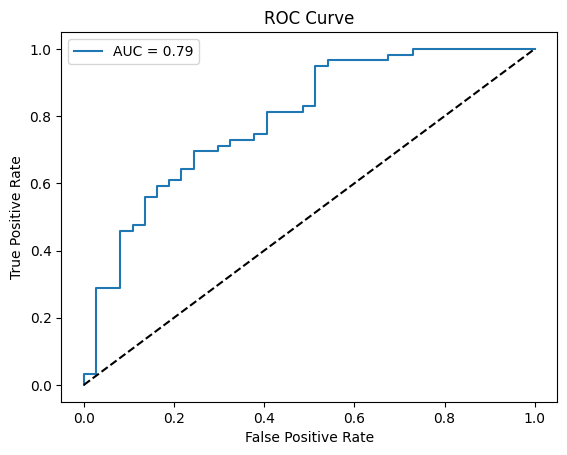

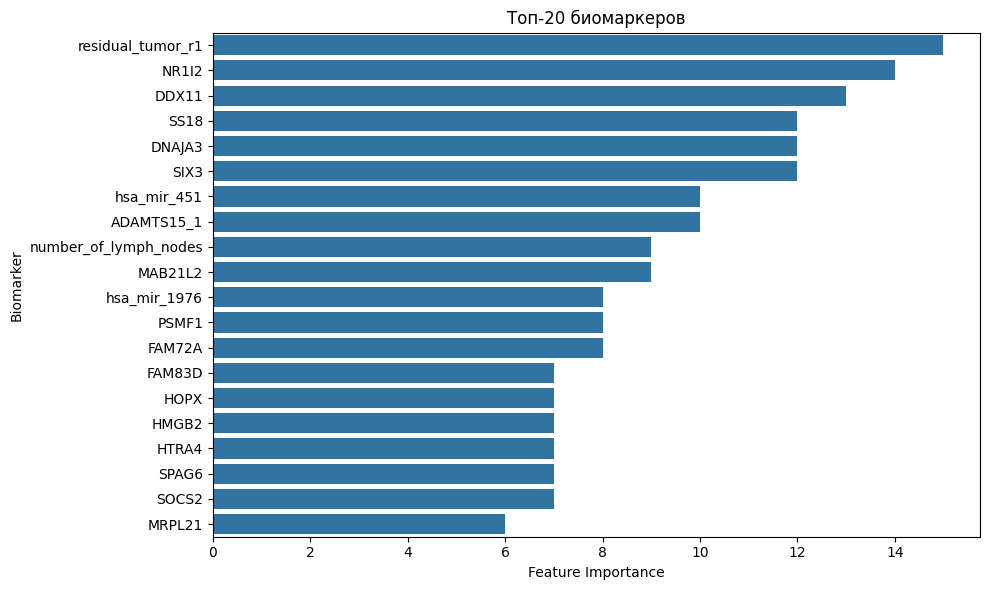


💾 Сохранено: top_20_biomarkers_lightgbm.csv


In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# 🧮 Метрики
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return {
        'Accuracy': (tp + tn) / (tp + tn + fp + fn),
        'Sensitivity': tp / (tp + fn) if (tp + fn) else 0,
        'Specificity': tn / (tn + fp) if (tn + fp) else 0,
        'PPV': tp / (tp + fp) if (tp + fp) else 0,
        'NPV': tn / (tn + fn) if (tn + fn) else 0,
        'F1-score': 2 * tp / (2 * tp + fp + fn) if (2 * tp + fp + fn) else 0,
        'MCC': matthews_corrcoef(y_true, y_pred)
    }

# 📥 Загрузка
df = pd.read_csv('/content/cleaned_normalized_data.csv', index_col=0)

# 🧼 Преобразование целевой переменной
df = df[df['pathology_T_stage'].isin(['t2', 't3'])]
df['pathology_T_stage'] = df['pathology_T_stage'].map({'t2': 0, 't3': 1}).astype(int)

# 🧠 One-hot encoding
df = pd.get_dummies(df, drop_first=True)

# 🧼 Очистка всех названий колонок от спецсимволов ПОСЛЕ get_dummies
df.columns = df.columns.str.replace(r'[^A-Za-z0-9_]', '_', regex=True)

# 🧪 Разделение
X = df.drop(columns='pathology_T_stage')
y = df['pathology_T_stage']

# 🚫 Удаление колонок с одинаковыми значениями
X = X.loc[:, (X != X.iloc[0]).any()]

# 🚂 Train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 🔍 Параметры
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 1],
    'reg_lambda': [0, 1]
}

# 🧠 RandomSearch
model = lgb.LGBMClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# ✅ Обучение
random_search.fit(X_train_full, y_train_full)
print(f"\n🎯 Best Parameters: {random_search.best_params_}")

# 📈 Финальная модель
final_model = random_search.best_estimator_
final_model.fit(X_train_full, y_train_full)
y_pred = final_model.predict(X_test)

# 📊 Метрики
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
metrics = calculate_metrics(y_test, y_pred)
print("\n📈 Метрики:")
for k, v in metrics.items():
    print(f"{k}: {v:.3f}")

# 🔵 ROC
probs = final_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, _ = roc_curve(y_test, probs)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# 🔬 Важность признаков
importances = final_model.feature_importances_
top_indices = np.argsort(importances)[-20:][::-1]
top_features = X.columns[top_indices]
top_scores = importances[top_indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_scores, y=top_features)
plt.title("Топ-20 биомаркеров")
plt.xlabel("Feature Importance")
plt.ylabel("Biomarker")
plt.tight_layout()
plt.show()

# 💾 Сохранение
pd.DataFrame({
    'Biomarker': top_features,
    'Importance': top_scores
}).to_csv("top_20_biomarkers_lightgbm.csv", index=False)

print("\n💾 Сохранено: top_20_biomarkers_lightgbm.csv")